# 目標：

1. 理解Dense Layer的輸入/輸出資料大小。
2. 能簡單的利用Dense Layer來建立模型。
3. 理解Convolution/Pooling Layer的輸入/輸出資料大小。

### [A. 測試Dense Layer I/O, 並以Dense Layer建立模型](#A.-%E6%B8%AC%E8%A9%A6Dense-Layer-I/O,-%E4%B8%A6%E4%BB%A5Dense-Layer%E5%BB%BA%E7%AB%8B%E6%A8%A1%E5%9E%8B%E3%80%82)
* [Sequential model: Logistic Regression](#Sequential-model:-Logistic-Regression)
* [Sequential model: Softmax Regression](#Sequential-model:-Softmax-Regression)
* [練習：建立Multilayer Perceptron的模型，並且丟亂數資料進去做訓練](#%E7%B7%B4%E7%BF%92%EF%BC%9A%E5%BB%BA%E7%AB%8BMultilayer-Perceptron%E7%9A%84%E6%A8%A1%E5%9E%8B%EF%BC%8C%E4%B8%A6%E4%B8%94%E4%B8%9F%E4%BA%82%E6%95%B8%E8%B3%87%E6%96%99%E9%80%B2%E5%8E%BB%E5%81%9A%E8%A8%93%E7%B7%B4%E3%80%82)

### [B. 測試Convolutional Layer I/O](#B.-%E6%B8%AC%E8%A9%A6Convolutional-Layer-I/O%E3%80%82)
### [C. 測試Max Pooling Layer I/O](#C.-%E6%B8%AC%E8%A9%A6Max-Pooling-Layer-I/O%E3%80%82)

---

In [59]:
# =========================================================================
# 由於課堂上可能有多人共用同一顆GPU，以下限定使用者只能用計算卡上45%的記憶體。
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.75 # 使用45%記憶體
set_session(tf.Session(config=config))
# =========================================================================

In [45]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D
from keras.optimizers import SGD

import numpy as np

---

## A. 測試Dense Layer I/O, 並以Dense Layer建立模型。

### Sequential model: Logistic Regression

In [3]:
randData=np.random.normal(0,1,(5,3))  # normal分佈的亂數資料當input, 
                                      # 5個樣本，每個樣本有3個特徵

model = Sequential()                  # 定義模型
model.add(Dense(1, input_shape=(3,),activation='sigmoid') ) 
# 模型加入只有一個神經元的Dense層，且用sigmoid啟用，輸出機率

model.predict(randData)  # 應該會回傳5個介於0和1之間的數值。分別為各樣本的預測機率

array([[0.5315271 ],
       [0.7996117 ],
       [0.31218493],
       [0.9597741 ],
       [0.19036081]], dtype=float32)

[回到頂部](#%E7%9B%AE%E6%A8%99%EF%BC%9A)

---

### Sequential model: Softmax Regression

In [26]:
randData=np.random.normal(0,1,(5,3))         # normal分佈的亂數資料當input, 5個樣本，每個樣本有3個特徵

model = Sequential()
model.add(Dense(3,input_shape=(3,), activation='softmax') )   # 定義3個神經元，並以Softmax啟用，輸出機率
print( model.predict(randData) )             # 往前傳遞
# print()

[[0.44183707 0.35615447 0.20200844]
 [0.54709595 0.2001699  0.25273412]
 [0.2297088  0.29350364 0.47678757]
 [0.31823158 0.5621407  0.11962772]
 [0.0566578  0.68113697 0.26220512]]


In [27]:
print( model.predict(randData).sum(axis=1) ) # 驗證softmax輸出：P_A+P_B+P_C=1

[0.99999994 1.         1.         1.         0.9999999 ]


In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 3)                 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [29]:
tmp_layer = model.layers[0]
weights, bias = tmp_layer.get_weights()
weights, bias

(array([[-0.49304628, -0.5279908 ,  0.5998237 ],
        [-0.60363865,  0.67630005,  0.18514037],
        [ 0.87039304,  0.61322784,  0.2442975 ]], dtype=float32),
 array([0., 0., 0.], dtype=float32))

In [24]:
weights.shape,bias.shape

((3, 3), (3,))

---

In [13]:
tmp = np.random.normal(5,0.01,size=100000)
tmp.mean(),tmp.std()

(4.9999817055948785, 0.010010410936965482)

In [33]:
# plt.hist(tmp,bins=100)

[回到頂部](#%E7%9B%AE%E6%A8%99%EF%BC%9A)

---

### 練習：建立Multilayer Perceptron的模型，並且將$X_{new}$, $y_{new}$丟進去做訓練。

In [6]:
import numpy as np

In [89]:
X=np.zeros((90,3))
for j in range(0,30):
    X[j,:]=0.
for j in range(30,60):
    X[j,:]=1.
for j in range(60,90):
    X[j,:]=2.
y=X[:,0]

# # data standarization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler=scaler.fit(X)
X_new=scaler.transform(X)

# # convert y into one-hot representation
from keras.utils import to_categorical
y_new=to_categorical(y)

# print("X_new=\n",X_new)
# print()
# print("y_new=\n",y_new)

In [110]:
# 練習於此
model=Sequential()
model.add(Dense(50, input_shape=(3,), activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [111]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01), metrics=['accuracy'])

In [112]:
record = model.fit(X_new, y_new, epochs=30)

Epoch 1/30
90/90 [==============================] - 0s 5ms/step - loss: 1.1653 - acc: 0.0000e+00
Epoch 2/30
90/90 [==============================] - 0s 128us/step - loss: 1.1279 - acc: 0.2111
Epoch 3/30
90/90 [==============================] - 0s 133us/step - loss: 1.0931 - acc: 0.3333
Epoch 4/30
90/90 [==============================] - 0s 153us/step - loss: 1.0593 - acc: 0.6667
Epoch 5/30
90/90 [==============================] - 0s 159us/step - loss: 1.0277 - acc: 0.6667
Epoch 6/30
90/90 [==============================] - 0s 147us/step - loss: 0.9968 - acc: 0.7667
Epoch 7/30
90/90 [==============================] - 0s 141us/step - loss: 0.9669 - acc: 1.0000
Epoch 8/30
90/90 [==============================] - 0s 135us/step - loss: 0.9389 - acc: 1.0000
Epoch 9/30
90/90 [==============================] - 0s 128us/step - loss: 0.9115 - acc: 1.0000
Epoch 10/30
90/90 [==============================] - 0s 143us/step - loss: 0.8860 - acc: 1.0000
Epoch 11/30
90/90 [============================

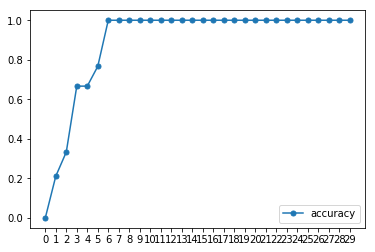

In [113]:
# 畫出訓練過程

plt.plot(record.history['acc'],ms=5,marker='o',label='accuracy')
plt.xticks(np.arange(30))
plt.legend()
plt.show()

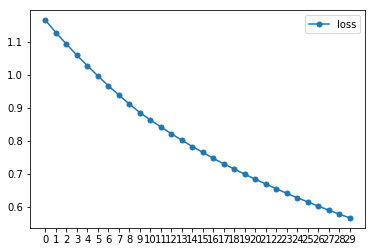

In [117]:
plt.plot(record.history['loss'],ms=5,marker='o',label='loss')
plt.xticks(np.arange(30))
plt.legend()
plt.show()

[回到頂部](#%E7%9B%AE%E6%A8%99%EF%BC%9A)

---

## B. 測試Convolutional Layer I/O。

### ```padding='valid'```

In [10]:
randData=np.random.normal(0,1,(10,5,5,3))  # normal分佈的亂數資料當input, 10個3D樣本

model = Sequential()
model.add(Conv2D(filters=96, kernel_size=(3, 3),
                 strides=(1,1),
                 padding='valid',
                 input_shape=(5,5,3)
                )
         )
print( model.predict(randData).shape )    # 看輸出資料的形狀

(10, 3, 3, 96)


### ```padding='same'```

padding = same: $ w'=w/s $

padding = valid: $w^{'}=\frac{W+2P-F}{S}+1$

In [115]:
randData=np.random.normal(0,1,(10,20,20,3))  # normal分佈的亂數資料當input, 10個3D樣本

model = Sequential()
model.add(Conv2D(filters=96, kernel_size=(7, 7),
                 strides=(1,1),
                 padding='same',
                 input_shape=(20,20,3)
                )
         )
print( model.predict(randData).shape )    # 看輸出資料的形狀

(10, 20, 20, 96)


* 若strides=(1,1)且```padding='same'```，則表示程式會利用padding來確保input data size和output data size相等。
* 若你想知道```padding='same'```和```padding='valid'```的公式，可見：https://www.tensorflow.org/api_guides/python/nn#Convolution

[回到頂部](#%E7%9B%AE%E6%A8%99%EF%BC%9A)

## C. 測試Max Pooling Layer I/O。

In [118]:
randData=np.random.normal(0,1,(10,4,4,3))  # normal分佈的亂數資料當input, 10個3D樣本
model = Sequential()
model.add(MaxPooling2D(pool_size=(2, 2),
                       strides=(2,2),
                       input_shape=(4,4,3)
                      )
         )
# model.add(MaxPooling2D(pool_size=(2, 2),
#                        strides=(2,2)                   
#                       )
#          )
print( model.predict(randData).shape )    # 看輸出資料的形狀

(10, 2, 2, 3)


[回到頂部](#%E7%9B%AE%E6%A8%99%EF%BC%9A)